### 0. Load Dataset


# Dataset: Phân loại đa nhãn các bài báo khoa học

## Ngữ cảnh
**NLP Task:** Dataset phục vụ cho bài toán **Phân loại đa nhãn**.  
Dataset này dùng để phân loại các bài báo khoa học dựa trên **Abstract** hoặc **Title** của bài báo.

## Nội dung
- Dataset chứa **6 nhãn khác nhau**:
  1. Computer Science (Khoa học máy tính)
  2. Physics (Vật lý)
  3. Mathematics (Toán học)
  4. Statistics (Thống kê)
  5. Quantitative Biology (Sinh học định lượng)
  6. Quantitative Finance (Tài chính định lượng)
- Mỗi cột nhãn có giá trị **1 hoặc 0**:
  - `1` → bài báo thuộc nhãn này  
  - `0` → bài báo không thuộc nhãn này
- **Đa nhãn:** mỗi bài báo có thể có **nhiều nhãn = 1**.

## Lời cảm ơn
Dataset được lấy từ **Hackathon Analytics Vidhya**.

## Cảm hứng
Mục tiêu là xây dựng mô hình **dự đoán nhãn cho các bài báo khoa học** để đạt kết quả tốt nhất cho bài toán phân loại đa nhãn.


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
FOLDER_DATASET = "/content/drive/MyDrive/Paper-Topic-Classification/dataset"

csv_files = [f for f in os.listdir(FOLDER_DATASET) if f.endswith('.csv')]

dfs = []

for file in csv_files:
    file_path = os.path.join(FOLDER_DATASET, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [ ]:
df = df.iloc[:, 2:]
df

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...
20967,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,We present a new approach for identifying si...,1,0,0,0,0,0
20970,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


### 1. Cleaning Dataset

In [ ]:
# Kiểm tra dữ liệu NaN
df.isna().sum()

,0
ABSTRACT,0
Computer Science,0
Physics,0
Mathematics,0
Statistics,0
Quantitative Biology,0
Quantitative Finance,0


In [ ]:
df = df.dropna()

In [ ]:
# Kiểm tra dữ liệu trùng lặp
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...
20967,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,We present a new approach for identifying si...,1,0,0,0,0,0
20970,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


### 2. Preprocess Dataset


In [ ]:
import re

def preprocess_text(text, remove_stopwords=True, do_lemmatize=True):

    # 1. Chuyển về lowercase
    text = text.lower()

    # 2. Loại bỏ khoảng trắng thừa
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    return text


df['ABSTRACT'] = df['ABSTRACT'].apply(preprocess_text)
df

,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,predictive models allow subject-specific infer...,1,0,0,0,0,0
1,rotation invariance and translation invariance...,1,0,0,0,0,0
2,we introduce and develop the notion of spheric...,0,0,1,0,0,0
3,the stochastic landau--lifshitz--gilbert (llg)...,0,0,1,0,0,0
4,fourier-transform infra-red (ftir) spectra of ...,1,0,0,1,0,0
...,...,...,...,...,...,...,...
20967,machine learning is finding increasingly broad...,1,1,0,0,0,0
20968,polycrystalline diamond coatings have been gro...,0,1,0,0,0,0
20969,we present a new approach for identifying situ...,1,0,0,0,0,0
20970,the sum of log-normal variates is encountered ...,0,0,1,1,0,0


In [ ]:
X = df['ABSTRACT'].values
y = df.drop(columns=['ABSTRACT']).values

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X_vect = model.encode(X, show_progress_bar=True)

Batches:   0%|          | 0/656 [00:00<?, ?it/s]

In [ ]:
X_vect.shape

(20972, 384)

### 3. Tranning Model

#### Loss Function cho Phân loại đa nhãn

Trong dự án phân loại đa nhãn các bài báo theo **Abstract**, output là xác suất mỗi nhãn (ví dụ: Computer Science, Physics, Mathematics, Statistics, ...). Chúng ta sử dụng **binary cross-entropy** cho từng nhãn.

#### 1. Phân loại nhị phân
Với mỗi nhãn, hàm loss cho một mẫu có dạng:

$$
\mathcal{L}(y, \hat{y}) = - \Big(y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \Big)
$$

Trong đó:  
- $y \in \{0,1\}$ là nhãn thực tế của mẫu.  
- $\hat{y}$ là xác suất dự đoán nhãn đó.

---

#### 2. Phân loại đa lớp (multi-class)
Nếu bài toán là phân loại **C nhãn** (C > 2), ta thường sử dụng **softmax** cho output và **cross-entropy**:

$$
\mathcal{L}(y, \hat{y}) = - \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
$$

Trong đó:  
- $N$ là số mẫu.  
- $C$ là số lớp.  
- $y_{ij}$ = 1 nếu mẫu $i$ thuộc lớp $j$, ngược lại 0.  
- $\hat{y}_{ij}$ là xác suất dự đoán mẫu $i$ thuộc lớp $j$.

---

#### 3. Multi-task / Multi-label learning
Với **multi-label** (nhãn không loại trừ nhau), mỗi nhãn được tính **binary cross-entropy** riêng:

$$
\mathcal{L}(y, \hat{y}) = - \sum_{i=1}^{N} \sum_{j=1}^{C} \Big( y_{ij} \cdot \log(\hat{y}_{ij}) + (1 - y_{ij}) \cdot \log(1 - \hat{y}_{ij}) \Big)
$$

Trong đó:  
- $i$ là chỉ số mẫu.  
- $j$ là chỉ số nhãn (task).  

> Như vậy, tổng thể hàm loss cho multi-label learning là **tổng các binary cross-entropy của từng nhãn** cho mỗi mẫu.

---

#### 4. Áp dụng trong dự án
- Với mỗi Abstract, output sẽ là một vector xác suất nhãn:  
  $\hat{y} = [\hat{y}_{CS}, \hat{y}_{Physics}, \hat{y}_{Math}, ...]$  
- Hàm loss tính tổng **binary cross-entropy** giữa nhãn thực tế và nhãn dự đoán cho tất cả nhãn.  
- Đây là cách phổ biến để huấn luyện mô hình phân loại đa nhãn.


In [ ]:
from sklearn.model_selection import train_test_split

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

NUM_LABELS = y.shape[1]

#Xây mô hình
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_vect.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(NUM_LABELS, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32
)


Epoch 1/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6385 - loss: 0.3597 - val_accuracy: 0.7616 - val_loss: 0.1814
Epoch 2/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7640 - loss: 0.1907 - val_accuracy: 0.7592 - val_loss: 0.1710
Epoch 3/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7753 - loss: 0.1728 - val_accuracy: 0.7831 - val_loss: 0.1673
Epoch 4/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.1634 - val_accuracy: 0.7807 - val_loss: 0.1652
Epoch 5/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7732 - loss: 0.1590 - val_accuracy: 0.7580 - val_loss: 0.1652
Epoch 6/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7747 - loss: 0.1560 - val_accuracy: 0.7712 - val_loss: 0.1622
Epoch 7/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.1487 - val_accuracy: 0.7777 - val_loss: 0.1639
Epoch 8/20
472/472 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7882 - loss: 0.1443 - val_accuracy: 0.

### 4. Evalue Model

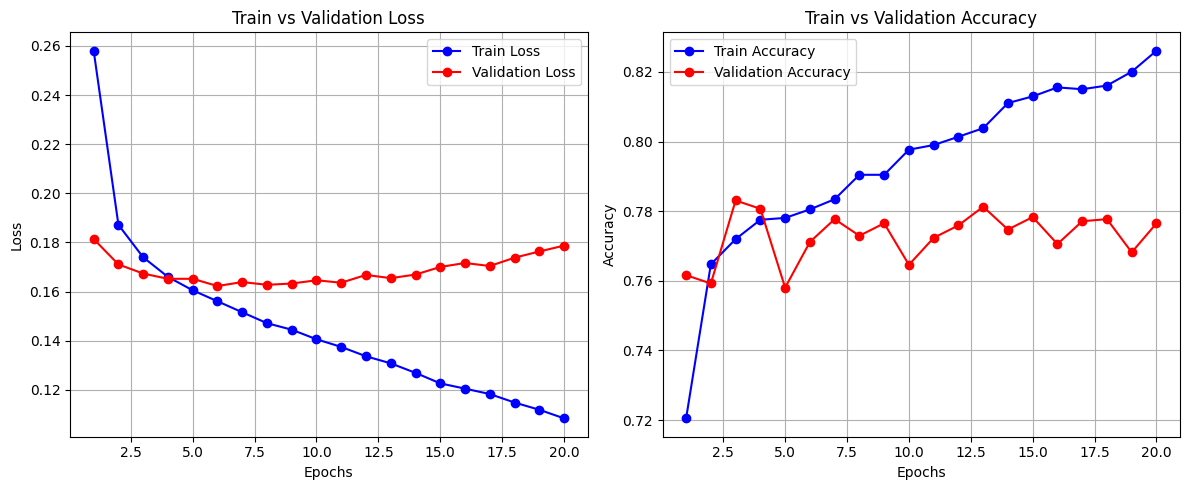

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b-', marker='o', label='Train Loss')
plt.plot(epochs, val_loss, 'r-', marker='o', label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epochs, accuracy, 'b-', marker='o', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'r-', marker='o', label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#### Micro F1 cho Phân loại đa nhãn

Trong bài toán phân loại đa nhãn, **Micro F1** là một metric phổ biến để đánh giá hiệu quả dự đoán. Nó tính tổng số **True Positive, False Positive, False Negative** của tất cả các nhãn, sau đó tính F1 score trên tổng số này.

---

#### 1. Công thức Micro F1

Giả sử:  
- $TP_j$, $FP_j$, $FN_j$ là số True Positive, False Positive, False Negative của nhãn $j$.  

**Tổng hợp các nhãn:**

$$
TP_{micro} = \sum_{j=1}^{C} TP_j, \quad
FP_{micro} = \sum_{j=1}^{C} FP_j, \quad
FN_{micro} = \sum_{j=1}^{C} FN_j
$$

**Precision và Recall micro:**

$$
Precision_{micro} = \frac{TP_{micro}}{TP_{micro} + FP_{micro}}, \quad
Recall_{micro} = \frac{TP_{micro}}{TP_{micro} + FN_{micro}}
$$

**Micro F1:**

$$
F1_{micro} = 2 \cdot \frac{Precision_{micro} \cdot Recall_{micro}}{Precision_{micro} + Recall_{micro}}
$$

> Micro F1 đặc biệt hữu ích khi các nhãn không cân bằng (imbalanced), vì nó tính tổng hợp trên tất cả nhãn.

---

#### 2. Áp dụng trong dự án

- `y_test`: ma trận nhãn thực tế (số mẫu × số nhãn)  
- `y_pred_binary`: ma trận dự đoán nhãn (0 hoặc 1, sau khi threshold xác suất)  


In [ ]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Tính Micro F1
f1 = f1_score(y_test, y_pred_binary, average='micro')
print("Micro F1:", f1)


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Micro F1: 0.8297067171239356


In [ ]:
# Test thử cho 5 mẫu ngẫu nhiên trên dữ liệu
label_names = df.drop(columns=['ABSTRACT']).columns.tolist()

sample_indices = np.random.choice(len(X), size=5, replace=False)

for idx in sample_indices:
    print(f"Sample {idx}:")
    print("ABSTRACT:", X[idx])

    labels = [label_names[i] for i, val in enumerate(y[idx]) if val == 1]
    print("True:", labels)

    y_pred = model.predict(np.expand_dims(X_vect[idx], axis=0))
    y_pred_binary = (y_pred[0] > 0.5).astype(int)
    predict_labels = [label_names[i] for i, val in enumerate(y_pred_binary) if val == 1]

    print("Predict:", predict_labels)
    print("-" * 80)


Sample 3340:
ABSTRACT: in all supersymmetric theories, gravitinos, with mass suppressed by the planck scale, are an obvious candidate for dark matter; but if gravitinos ever reached thermal equilibrium, such dark matter is apparently either too abundant or too hot, and is excluded. however, in theories with an axion, a saxion condensate is generated during an early era of cosmological history and its late decay dilutes dark matter. we show that such dilution allows previously thermalized gravitinos to account for the observed dark matter over very wide ranges of gravitino mass, kev < $m_{3/2}$ < tev, axion decay constant, $10^9$ gev < $f_a$ < $10^{16}$ gev, and saxion mass, 10 mev < $m_s$ < 100 tev. constraints on this parameter space are studied from bbn, supersymmetry breaking, gravitino and axino production from freeze-in and saxion decay, and from axion production from both misalignment and parametric resonance mechanisms. large allowed regions of $(m_{3/2}, f_a, m_s)$ remain, but 

In [ ]:
from sentence_transformers import SentenceTransformer

model_emb = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
# Ví dụ cho bài báo Attention is all you need
Attention_is_all_you_need_abstract = """The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring significantly
less time to train. Our model achieves 28.4 BLEU on the WMT 2014 English-to-German translation task, improving over the existing best results, including
ensembles, by over 2 BLEU. On the WMT 2014 English-to-French translation task,
our model establishes a new single-model state-of-the-art BLEU score of 41.8 after
training for 3.5 days on eight GPUs, a small fraction of the training costs of the
best models from the literature. We show that the Transformer generalizes well to
other tasks by applying it successfully to English constituency parsing both with
large and limited training data."""

Attention_is_all_you_need_abstract_encode = model_emb.encode([Attention_is_all_you_need_abstract])

y_pred = model.predict(Attention_is_all_you_need_abstract_encode)
y_pred_binary = (y_pred[0] > 0.5).astype(int)

predict_labels = [label_names[i] for i, val in enumerate(y_pred_binary) if val == 1]
print("Predict:", predict_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predict: ['Computer Science']


### 5. Save Model

In [ ]:
# Lưu mô hình
model.save("/content/drive/MyDrive/Topic-Paper-Classification/model.keras")